In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("games.json")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97410 entries, 0 to 97409
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        97410 non-null  int64  
 1   name                      97404 non-null  object 
 2   release_date              97410 non-null  object 
 3   estimated_owners          97410 non-null  object 
 4   peak_ccu                  97410 non-null  int64  
 5   required_age              97410 non-null  int64  
 6   price                     97410 non-null  float64
 7   dlc_count                 97410 non-null  int64  
 8   main_description          92540 non-null  object 
 9   supported_languages       97410 non-null  object 
 10  full_audio_languages      97410 non-null  object 
 11  reviews                   10125 non-null  object 
 12  header_image              97410 non-null  object 
 13  website                   42737 non-null  object 
 14  suppor

In [4]:
df[df["ID"] == 22380]

,ID,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,main_description,supported_languages,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,packages,developers,publishers,categories,genres,tags,screenshots
1025,22380,Fallout: New Vegas,"Oct 19, 2010",2000000 - 5000000,5776,16,9.99,0,Welcome to Vegas. New Vegas. It’s the kind of ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,3044,112,976,153,Obsidian Entertainment,Bethesda Softworks,"Single-player,Steam Achievements,Partial Contr...","Action,RPG","Open World,RPG,Post-apocalyptic,Singleplayer,M...",https://cdn.akamai.steamstatic.com/steam/apps/...


# Columns/Variables: 	ID	name	release_date	estimated_owners	peak_ccu	required_age	price	dlc_count	main_description	supported_languages	average_playtime_forever	average_playtime_2weeks	median_playtime_forever	packages	developers	publishers	categories	genres	tags	screenshots

In [5]:
cod_games = df[df['name'].str.contains('Call of Duty', case=False, na=False)]
print(cod_games)

            ID                                              name  \
136       7940                  Call of Duty® 4: Modern Warfare®   
3073     42710                          Call of Duty®: Black Ops   
7629    393080         Call of Duty®: Modern Warfare® Remastered   
8176    202990                       Call of Duty®: Black Ops II   
15118   311210                      Call of Duty®: Black Ops III   
16436   209160                             Call of Duty®: Ghosts   
20805     2640                    Call of Duty: United Offensive   
21930   209650    Call of Duty®: Advanced Warfare - Gold Edition   
22085   209660    Call of Duty®: Advanced Warfare - Gold Edition   
24094   476600                               Call of Duty®: WWII   
27498    10090                        Call of Duty: World at War   
29125    42680                  Call of Duty®: Modern Warfare® 3   
29670    42700                          Call of Duty®: Black Ops   
31616   202970                       Call of Dut

<AxesSubplot:xlabel='price', ylabel='metacritic_score'>

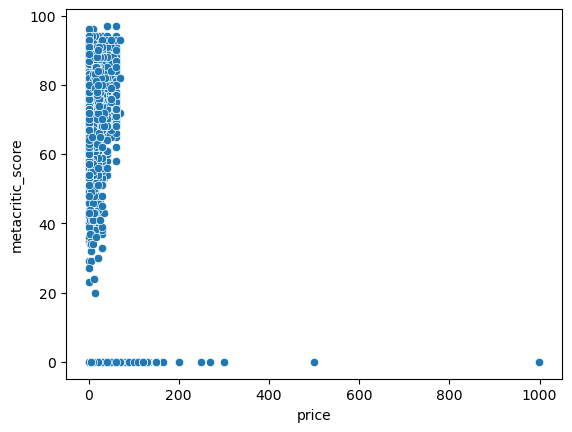

In [6]:
sns.scatterplot(data=df, x='price', y='metacritic_score')

# Most of the data seems to collect around a mid to high metacritic score while being cheap (0-200). There is a flat collection of points at a low metacritic score of 0, being between 0 and 200 dollars. There are two outliers with a low metacritic score, with the first at the price of around 500 and the other around the price of 1000. Skewed heavily to the right.

In [7]:
df[df["price"] == 999.98]

,ID,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,main_description,supported_languages,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,packages,developers,publishers,categories,genres,tags,screenshots
81901,2499620,The Leverage Game,"Aug 25, 2023",0 - 20000,0,0,999.98,0,The Leverage Game is a board game in which pla...,"['English', 'Japanese']",...,0,0,0,0,A&S Inc.,A&S Inc.,"Single-player,Multi-player,PvP,Online PvP","Indie,Simulation",None,https://cdn.akamai.steamstatic.com/steam/apps/...
82971,2504210,The Leverage Game Business Edition,"Aug 26, 2023",0 - 20000,0,0,999.98,0,The Leverage Game is a board game in which pla...,"['English', 'Japanese']",...,0,0,0,0,A&S Inc.,A&S Inc.,"Single-player,Multi-player,PvP","Indie,Simulation",None,https://cdn.akamai.steamstatic.com/steam/apps/...


<AxesSubplot:xlabel='recommendations', ylabel='price'>

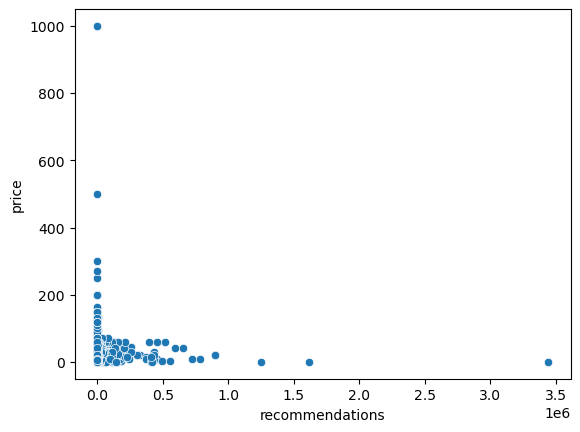

In [8]:
sns.scatterplot(data=df, x='recommendations', y='price')

# The data seems to have a lot of low recommendations with the majority of the data points being around lower prices. There are some outliers in the data with high prices and low recs, while some outliers have high recs with low prices. The direction of the scatterplot seems to be mostly in a negative direction, with the form being with lower prices, the most recommendations are given (this explains the relationship).

In [14]:
subDF = df[["positive", "negative"]]
subDF.corr(method="pearson")

,positive,negative
positive,1.000000,0.782384
negative,0.782384,1.000000


<AxesSubplot:xlabel='positive', ylabel='negative'>

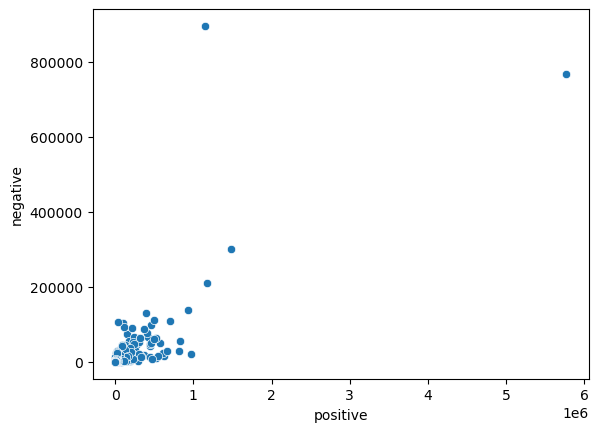

In [15]:
sns.scatterplot(data=df, x="positive", y="negative")

In [16]:
df['positive'].corr(df['negative'])

0.7823842565518223

<AxesSubplot:xlabel='price', ylabel='user_score'>

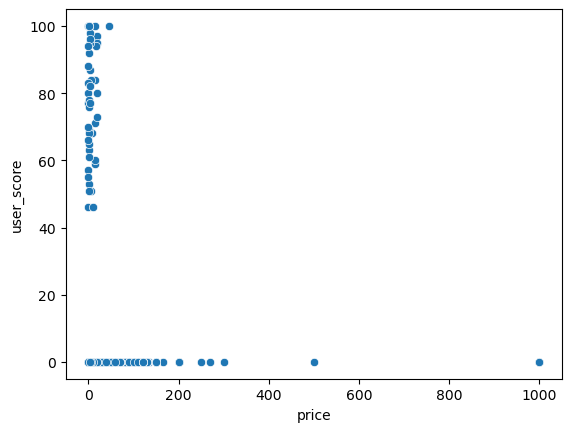

In [17]:
sns.scatterplot(data=df, x="price", y="user_score")

In [18]:
df['price'].corr(df['user_score'])

-0.0004894138906014804